In [87]:
import numpy as np
import math
import pandas as pd
from plotnine import *

In [97]:
freq = 2

def sinwave(i ,freq=freq):
    return math.sin(2*math.pi*freq*i)

f = [(i,sinwave(i)) for i in np.linspace(0,4,500)]

In [98]:
df = pd.DataFrame(f , columns=["t" , "y"])

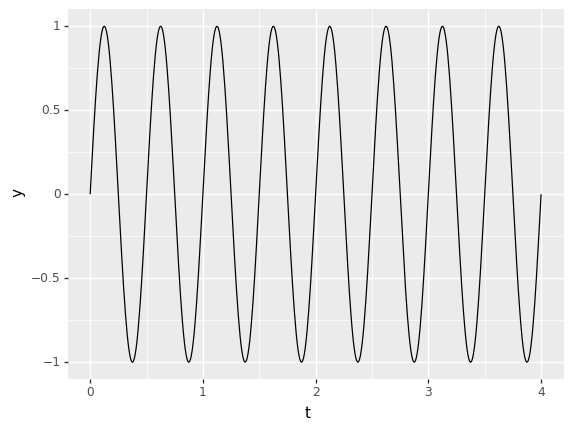

<ggplot: (-9223371911501863108)>

In [99]:
(
    ggplot(df , aes(x="t" , y="y" , group=1))
    + geom_line()
)

In [116]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [170]:
def plotWithTime( time , fft_freq ,wavefunction=sinwave, limits=(-1,1)):
    interval= [0,10]
    fft = [(i,math.sin(2*math.pi*fft_freq*i)*wavefunction(i) , math.cos(2*math.pi*fft_freq*i)*wavefunction(i)) for i in np.linspace(interval[0],interval[1],500)]
    fftdf = pd.DataFrame(fft , columns=["t","x" , "y"])
    
    fftdf = fftdf[fftdf["t"] < time]
    
    p = (
        ggplot(fftdf , aes(x="x" , y="y"))
         + geom_point()
        + geom_rect(xmin=fftdf["x"].mean(), xmax=fftdf["x"].mean()+0.1 , ymin=fftdf["y"].mean() , ymax=fftdf["y"].mean()+.1 , fill="green")
         + scale_x_continuous(limits=limits)
        + scale_y_continuous(limits=limits)
        + ggtitle(f"Freq - {fft_freq} , Time - {time}")
    )
    print(p)

In [171]:
(
    interact(plotWithTime
             ,wavefunction=fixed(sinwave)
             ,limits=fixed((-1,1))
             , time=widgets.FloatSlider(min=0.1 , max=4 , step=0.1)
            , fft_freq=widgets.IntSlider(min=1 , max=5)
            )
)

interactive(children=(FloatSlider(value=0.1, description='time', max=4.0, min=0.1), IntSlider(value=1, descrip…

<function __main__.plotWithTime(time, fft_freq, wavefunction=<function sinwave at 0x000001D2F9E03B70>, limits=(-1, 1))>

In [172]:
(
    interact(plotWithTime
             ,wavefunction=fixed(lambda i : math.sin(2*math.pi*2*i) + math.sin(2*math.pi*5*i) )
             ,limits=fixed([-2,2])
             , time=widgets.FloatSlider(min=0.1,max=7 , step=0.1)
            , fft_freq=widgets.IntSlider(min=1 , max=5)
            )
)

interactive(children=(FloatSlider(value=0.1, description='time', max=7.0, min=0.1), IntSlider(value=1, descrip…

<function __main__.plotWithTime(time, fft_freq, wavefunction=<function sinwave at 0x000001D2F9E03B70>, limits=(-1, 1))>